In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the stock data into a pandas dataframe
df = pd.read_csv('TSLA.csv')

In [3]:
# Define a function to identify the bullish engulfing pattern
def is_bullish_engulfing(row):
    # Check that the pattern exists
    if len(df) < 2 or row.name < 1:
        return False
    # Check that the pattern is a bullish engulfing
    prev_close = df.loc[row.name - 1, 'Close']
    prev_open = df.loc[row.name - 1, 'Open']
    curr_close = row['Close']
    curr_open = row['Open']
    if curr_close > curr_open and curr_open < prev_close and curr_close > prev_open:
        return True
    else:
        return False

# Identify the bullish engulfing patterns in the data
bullish_engulfing_mask = df.apply(is_bullish_engulfing, axis=1)
bullish_engulfing_dates = df[bullish_engulfing_mask]['Date']

In [4]:
# Print out the dates of the patterns
print('Dates of bullish engulfing patterns:')
for date in bullish_engulfing_dates:
    print(date)

Dates of bullish engulfing patterns:
2022-05-02
2022-05-04
2022-05-25
2022-06-02
2022-06-22
2022-07-05
2022-07-06
2022-07-08
2022-07-13
2022-07-14
2022-07-29
2022-09-07
2022-09-08
2022-09-15
2022-09-16
2022-09-19
2022-09-20
2022-10-13
2022-10-21
2022-10-24
2022-10-25
2022-10-26
2022-10-31
2022-11-11
2022-12-30
2023-01-06
2023-01-12
2023-01-24
2023-01-25
2023-02-03
2023-02-08
2023-02-14
2023-03-16
2023-04-10
2023-04-14


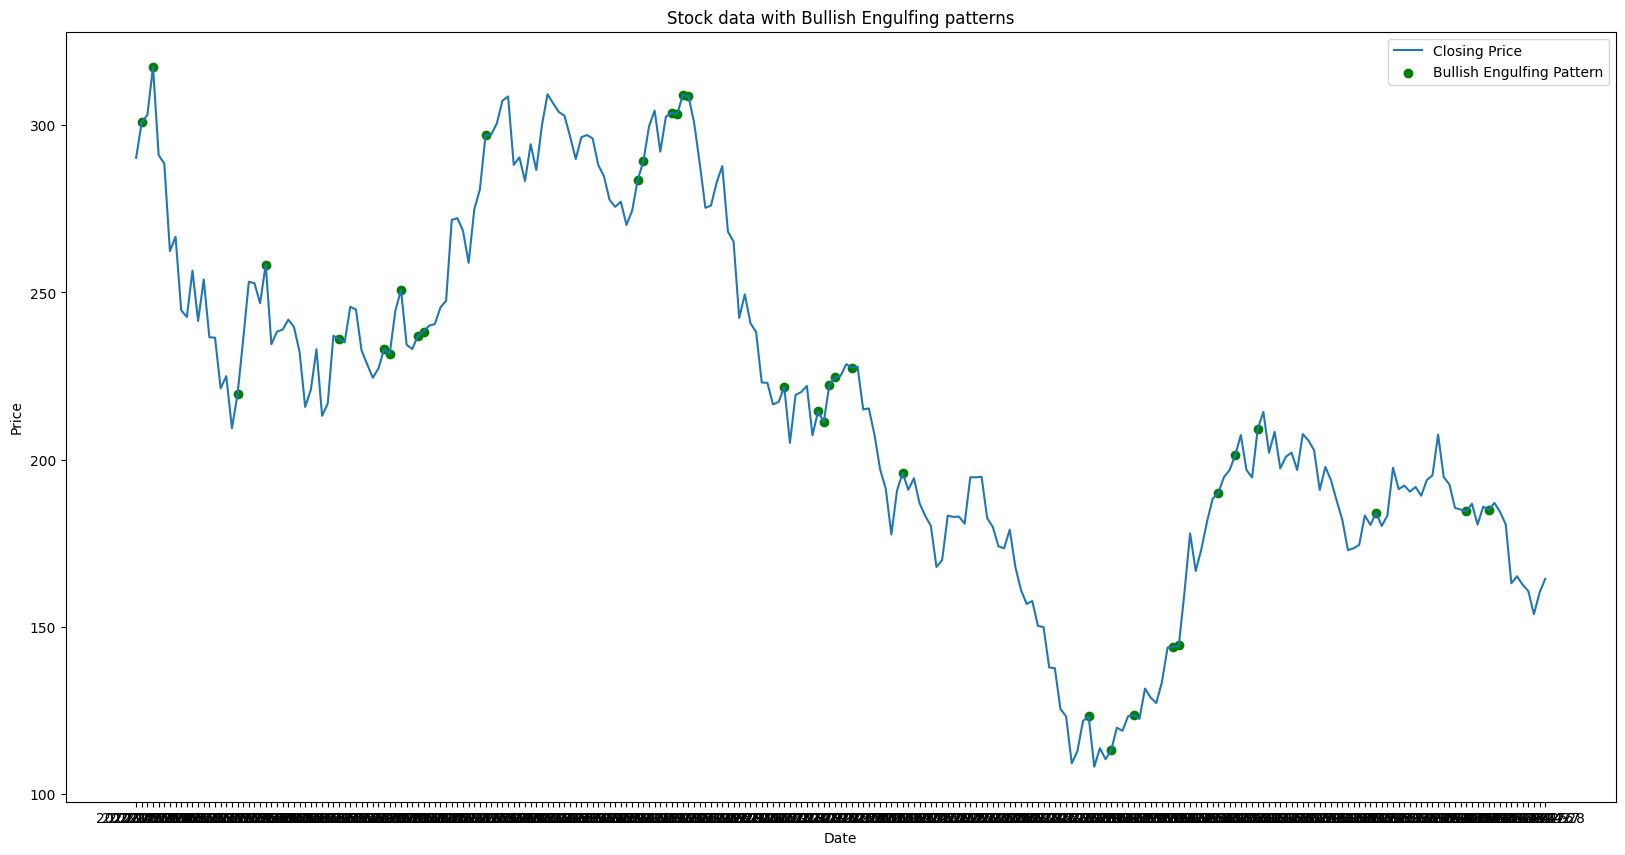

In [5]:
# Plot the stock data with the patterns highlighted
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df['Date'], df['Close'], label='Closing Price')
ax.scatter(bullish_engulfing_dates, df[bullish_engulfing_mask]['Close'], color='g', label='Bullish Engulfing Pattern')
ax.set_title('Stock data with Bullish Engulfing patterns')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
plt.show()
